# Sarah's Auto MPG Data Set

**Author:** Sarah Howard 

**Date:** April 20, 2025

**Objective:** Training a regression model to predict fuel efficency based on engine specs and weight.

## Introduction

Using the UCI Auto MPG Dataset, I will be training a model to predict how many miles per gallon a vehicle will use based on engine specs and weight.

## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from sklearn.preprocessing import LabelEncoder
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.metrics import confusion_matrix
#from sklearn.tree import plot_tree
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score

## Section 1. Import and Inspect the Data

### 1.1 Load the UCI Auto-mpg dataset and confirm it’s structured correctly

In [45]:
# Load the UCI auto=-mpg dataset from Projects Regression (Final) Data folder
df = pd.read_csv(r"C:\Projects\applied-ml-showard\regression\auto-mpg.csv", delimiter=",")

# Display info
df.info()

# Display the first 10 rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### 1.2 Display basic summary statistics

In [46]:
# Check for missing statistics
df.isnull().values.any()

np.False_

In [47]:
# Display summary statistics
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


### Reflection 1: 

**What do you notice about the dataset?**<br>
I am finding it interesting that the mean of cyclinders is 5.454774, but the 25% and 50% are 4 cyclinders. I also am finding difference between the mean and the 50% mark for displacement to be interesting.
 
**Are there any data issues?**<br>
The data appears to be complete and does not have missing values. I am not sure what the origin column is representing.

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

#### Scatter matrixes

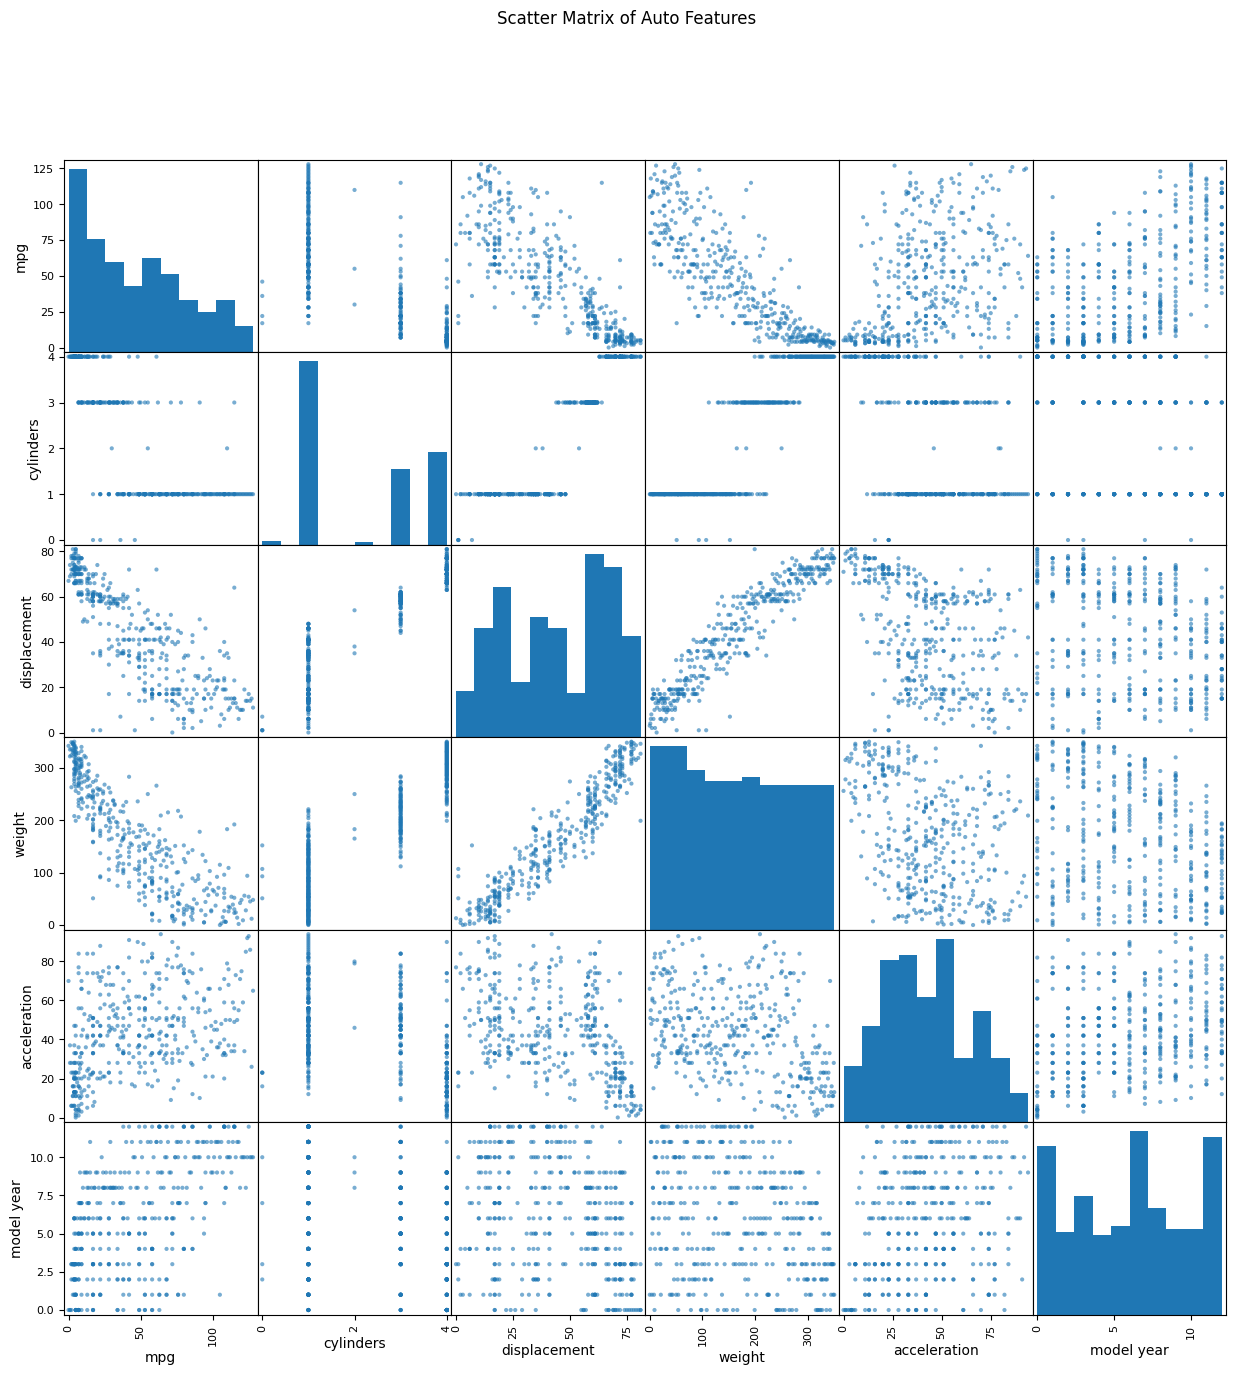

In [48]:
# Use a scatter matrix to visualize feature relationships and distributions:
# List of attributes you want to plot
attributes = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year']

# Create a copy of the relevant columns
df_subset = df[attributes].copy()

# Encode all categorical columns to numeric
for col in df_subset.columns:
    le = LabelEncoder()
    df_subset[col] = le.fit_transform(df_subset[col])

# Plot the scatter matrix
scatter_matrix(df_subset, figsize=(15, 15), diagonal='hist', alpha=0.6)
plt.suptitle("Scatter Matrix of Auto Features")
plt.show()

#### Histograms

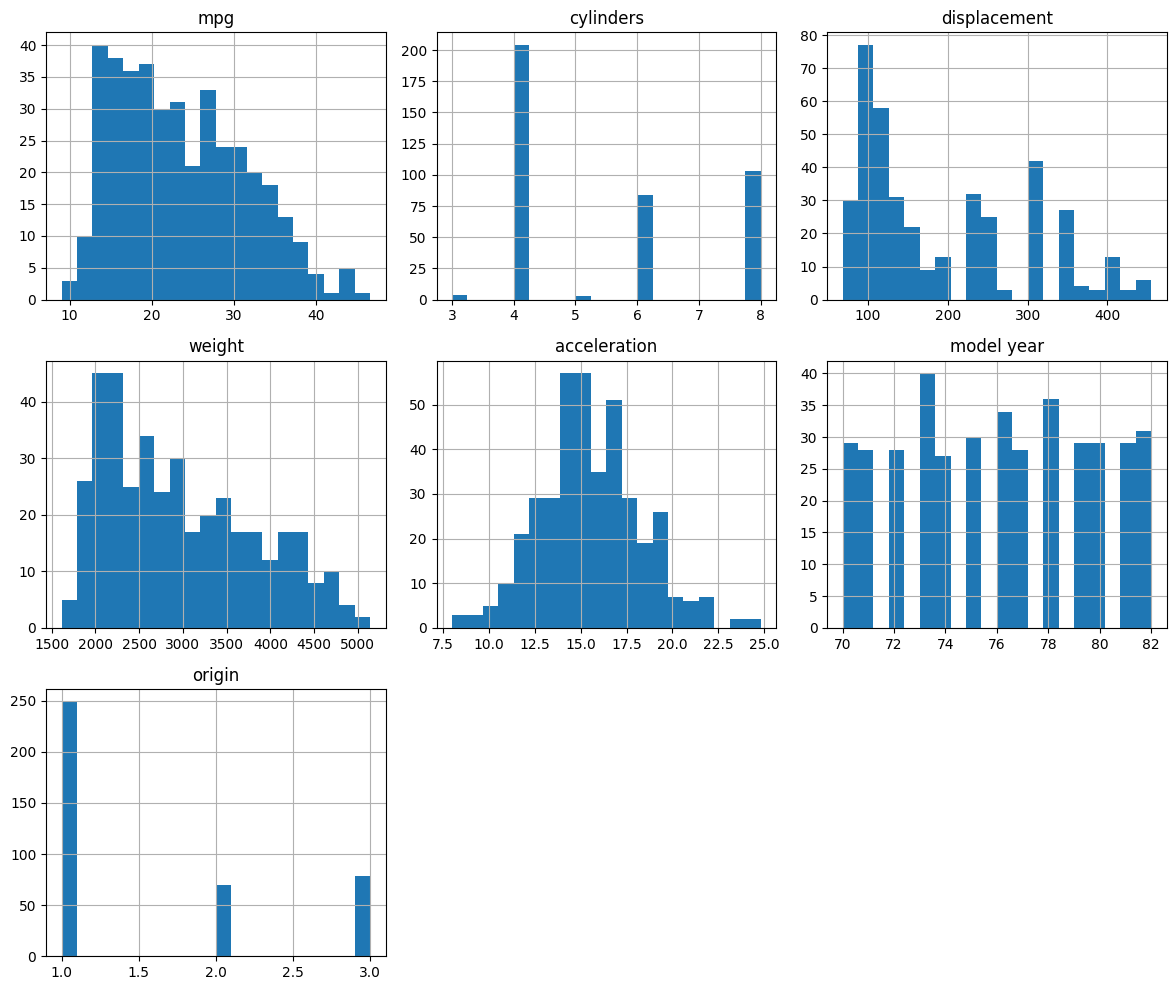

In [49]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

Boxplots

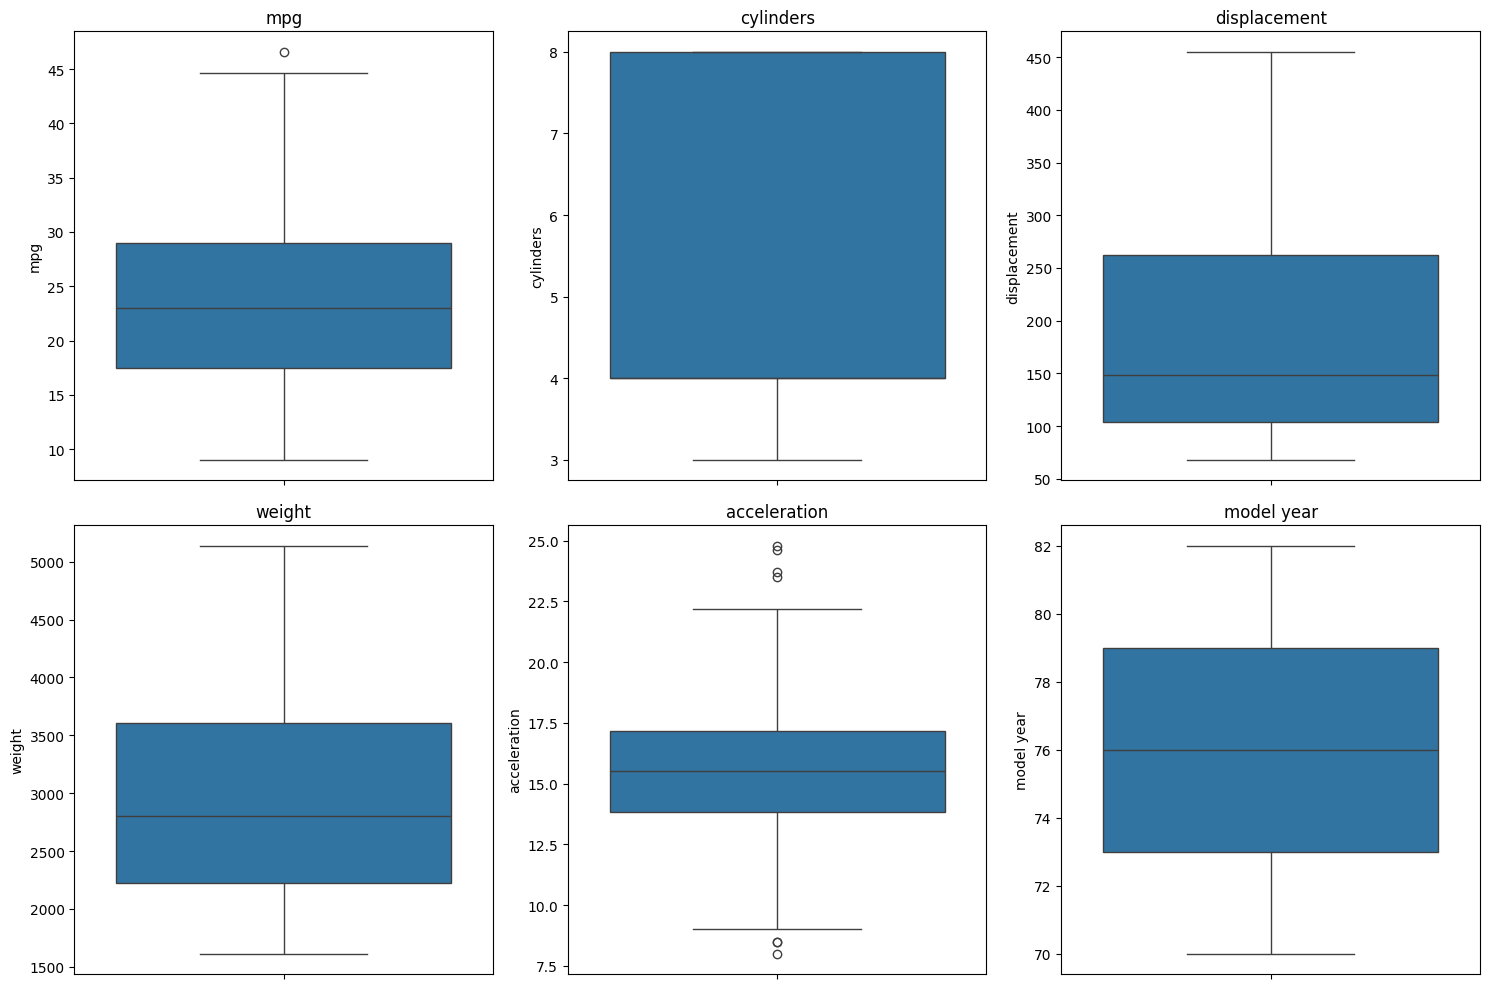

In [50]:
attributes = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, attr in enumerate(attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(y=df[attr], ax=axes[row][col])
    axes[row][col].set_title(f'{attr}')
    axes[row][col].set_ylabel(attr)

plt.tight_layout()
plt.show()

Count plots

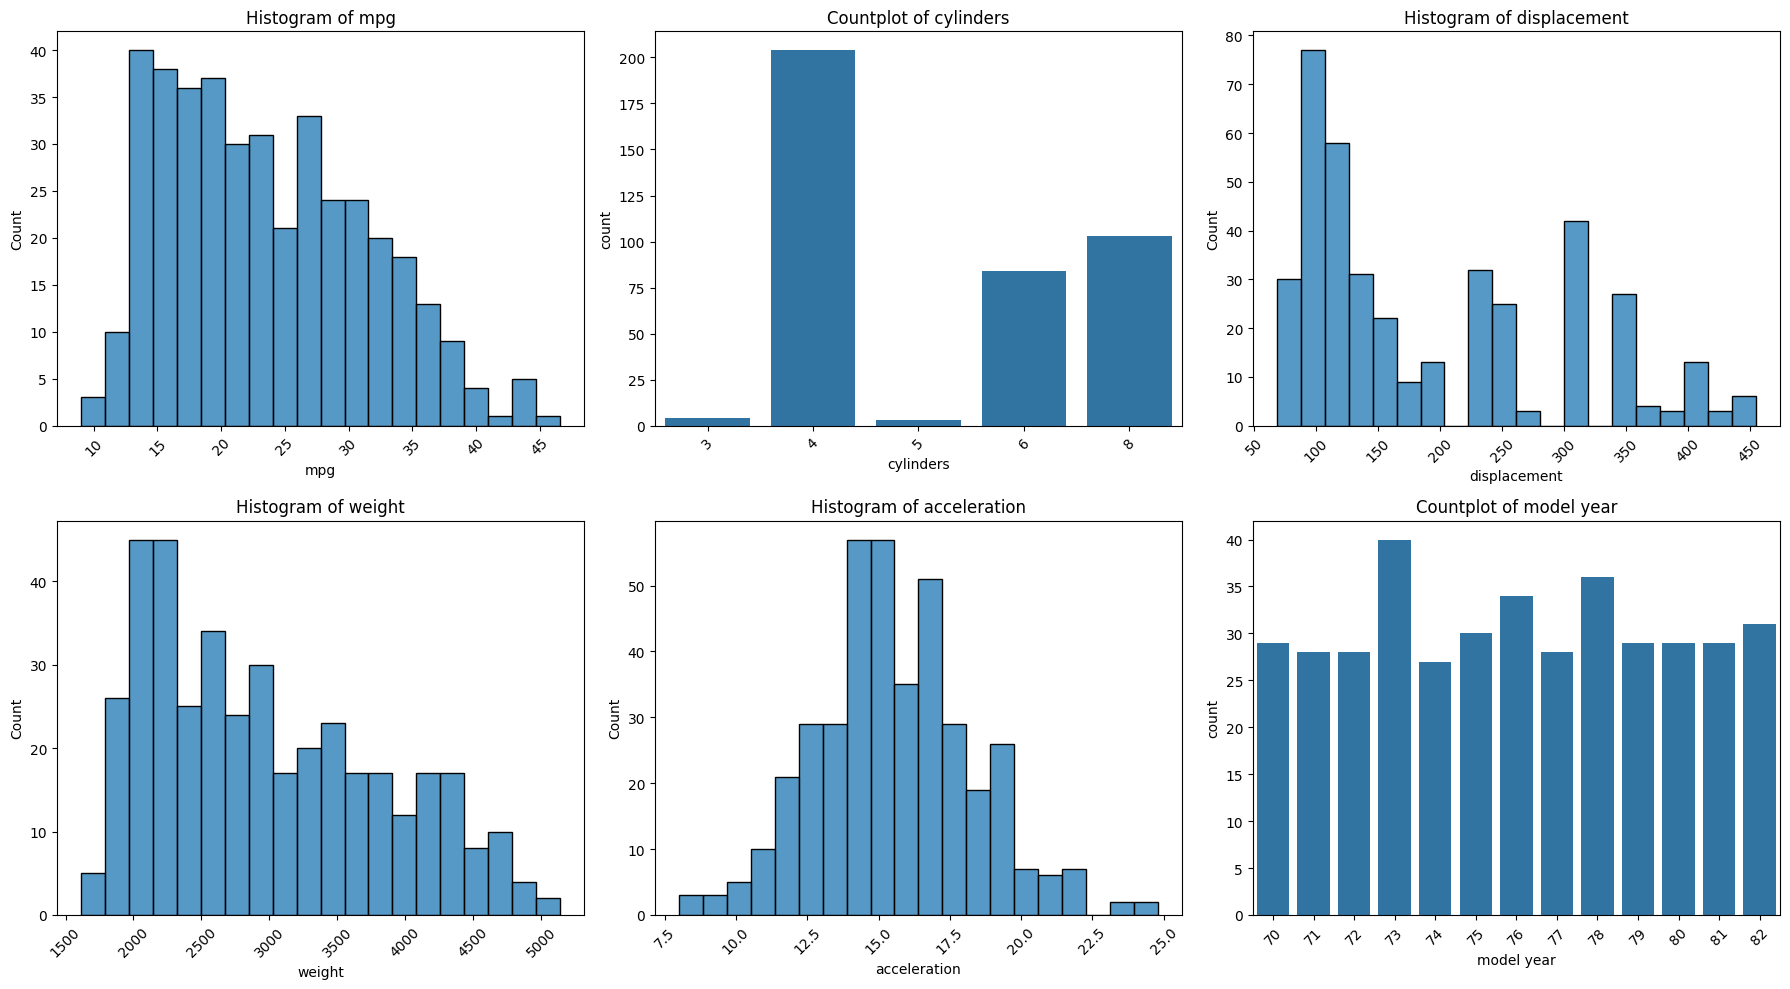

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, attr in enumerate(attributes):
    row = i // 3
    col = i % 3
    # For continuous attributes, use binning by converting to category
    if df[attr].nunique() > 20:
        sns.histplot(df[attr], bins=20, ax=axes[row][col])
        axes[row][col].set_title(f'Histogram of {attr}')
    else:
        sns.countplot(x=df[attr], ax=axes[row][col])
        axes[row][col].set_title(f'Countplot of {attr}')
    axes[row][col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.2 Cleaning the data

#### Removing outliers

In [ ]:
df_clean = df.copy()

for attr in attributes:
    Q1 = df_clean[attr].quantile(0.25)
    Q3 = df_clean[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_clean = df_clean[(df_clean[attr] >= lower_bound) & (df_clean[attr] <= upper_bound)]

print(f"Original rows: {df.shape[0]}")
print(f"Cleaned rows: {df_clean.shape[0]}")

Original rows: 398
Cleaned rows: 387


### Encode the dataset from categorical to numerical

In [59]:
# Encode the car name attribute
df['car_name_original'] = df['car name']

label_encoder = LabelEncoder()
df['car_name_encoded'] = label_encoder.fit_transform(df['car_name_original'])

df[['car_name_original', 'car_name_encoded']].head()

mapping_df = pd.DataFrame({
    'car_name_original': label_encoder.classes_,
    'car_name_encoded': range(len(label_encoder.classes_))
})

print(mapping_df)


           car_name_original  car_name_encoded
0    amc ambassador brougham                 0
1         amc ambassador dpl                 1
2         amc ambassador sst                 2
3                amc concord                 3
4            amc concord d/l                 4
..                       ...               ...
300       vw dasher (diesel)               300
301                vw pickup               301
302                vw rabbit               302
303     vw rabbit c (diesel)               303
304         vw rabbit custom               304

[305 rows x 2 columns]


### 2.3 Feature selection and engineering

#### Create a new category with model year and car name

In [60]:
# Step 1: Ensure 'model year' is numeric
df['model year'] = pd.to_numeric(df['model year'], errors='coerce')

# Step 2: Create the full year (assume 1900s — or change logic if needed)
df['full_year'] = df['model year'].astype(int) + 1900

# Step 3: Combine with car name
df['model_year_full'] = df['car name'].astype(str) + ' ' + df['full_year'].astype(str)

df[['car name', 'model year', 'model_year_full']].head()

,car name,model year,model_year_full
0,chevrolet chevelle malibu,70,chevrolet chevelle malibu 1970
1,buick skylark 320,70,buick skylark 320 1970
2,plymouth satellite,70,plymouth satellite 1970
3,amc rebel sst,70,amc rebel sst 1970
4,ford torino,70,ford torino 1970


### Reflection 2:

**What patterns or anomalies do you see? Do any features stand out?**<br>
Displacement and weight appear to have a linear relationship with mpg. Cylinders and model year also appear there could be a linear relationship but there are a lot more outliers for those features. Acceleration does not have appear to have a clear pattern to it and appears more random.

**What preprocessing steps were necessary to clean and improve the data?**<br>
To clean the data, I dropped outliers that were less than the 25% percentile and over the 75th percentile. The car name feature was encoded to a numerical value.

**Did you create or modify any features to improve performance?**<br>
I created a feature that is the combination of the model year and car name. I think The combination of car name and model year will give a better results for predicting mpg than looking at either feature individually.

## Section 3. Feature Selection and Justifications

### 3.1 Choose features and targets

**Case 1 - Cap Shape only**

Input features: cap-shape

Target: poisonous

**Case 2 - Cap Color only**

Input features: cap-color

Target: poisonous

**Case 3 - Bruises only**

Input features: bruises

Target: poisonous

**Case 4 - Odor only**

Input features: odor

Target: poisonous

**Case 5 - Habitat only**

Input features: habitat

Target: poisonous

**Case 6 - Cap-shape and odor**

Input features: cap-shape and odor

Target: poisonous

### 3.2 Define X and y

In [515]:
# Case 1. Cap-shape
X1 = df_encoded[['cap-shape']]
y1 = df_encoded['class']

# Case 2. Cap-color
X2 = df_encoded[['cap-color']]
y2 = df_encoded['class']

# Case 3. Bruises
X3 = df_encoded[['bruises']]
y3 = df_encoded['class']

# Case 4. Odor
X4 = df_encoded[['odor']]
y4 = df_encoded['class']

# Case 5. Habitat
X5 = df_encoded[['habitat']]
y5 = df_encoded['class']

# Case 6. Cap-shape and odor
X6 = df_encoded[['cap-shape', 'odor']]
y6 = df_encoded['class']

### Reflection 3: 
**Why did you choose these features?**<br>
I tried to chose features that did not have an equal distribution of poisonous vs edible in their results.
**How might they impact predictions or accuracy?**<br>
In looking at how the data presented, I thought it might be able to give fairly accurate results as it seemed like a certain variable was more likely to be poisonous than edible and vice versa.

## Section 4. Train a Decision Tree Model

**Decision Matrix for Case 1** 

In [516]:
# Using the encoded data
df_case1 = df_encoded[['cap-shape', 'class']]

# Create a decision matrix / cross-tab
decision_matrix1 = pd.crosstab(df_case1['cap-shape'], df_case1['class'])

# Decode cap-shape for readability
df_case1['cap-shape-decoded'] = label_encoders['cap-shape'].inverse_transform(df_case1['cap-shape'])

# Cross-tab with decoded labels
decision_matrix1 = pd.crosstab(df_case1['cap-shape-decoded'], df_case1['class'])

# Optional: decode the class too
decision_matrix1.columns = ['edible', 'poisonous']

print(decision_matrix)

                   edible  poisonous
cap-color-decoded                   
0                      48        120
1                      32         12
2                     624        876
3                    1032        808
4                    1264       1020
5                      56         88
6                      16          0
7                      16          0
8                     720        320
9                     400        672


C:\Users\Sarah\AppData\Local\Temp\ipykernel_13736\2710074298.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case1['cap-shape-decoded'] = label_encoders['cap-shape'].inverse_transform(df_case1['cap-shape'])


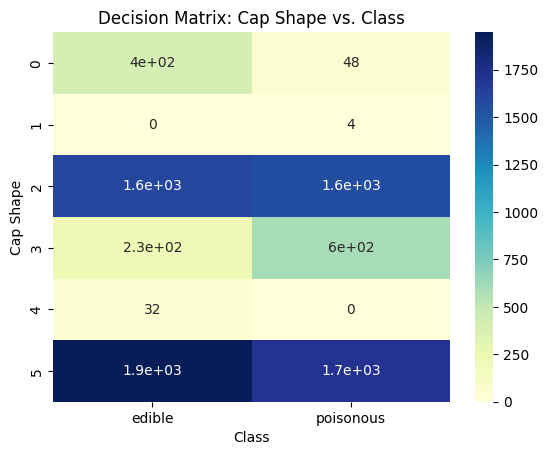

In [517]:
sns.heatmap(decision_matrix1, annot=True, cmap='YlGnBu')
plt.xlabel('Class')
plt.ylabel('Cap Shape')
plt.title('Decision Matrix: Cap Shape vs. Class')
plt.show()

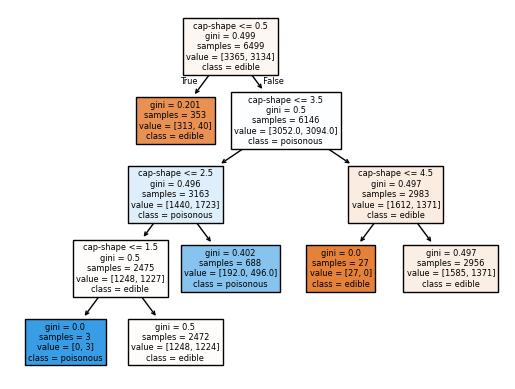

In [518]:
X1_single_feature = df_encoded[['cap-shape']]
y = df_encoded['class']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_single_feature, y1, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier()
tree_model.fit(X1_train, y1_train)


# Plot the tree
plot_tree(tree_model, feature_names=['cap-shape'], class_names=['edible', 'poisonous'], filled=True)
plt.show()

In [519]:
# Predict on training data
y1_train_pred = tree_model.predict(X1_train)

# Predict on test data
y1_pred = tree_model.predict(X1_test)


print("Classification Report for Training Data for Case 1:")
print(classification_report(y1_train, y1_train_pred))

print("Classification Report for Test Data for Case 1:")
print(classification_report(y1_test, y1_pred))

print("Confusion Matrix for Case 1:")
print(confusion_matrix(y1_test, y1_pred))

Classification Report for Training Data for Case 1:
              precision    recall  f1-score   support

           0       0.55      0.94      0.69      3365
           1       0.72      0.16      0.26      3134

    accuracy                           0.57      6499
   macro avg       0.63      0.55      0.48      6499
weighted avg       0.63      0.57      0.48      6499

Classification Report for Test Data for Case 1:
              precision    recall  f1-score   support

           0       0.54      0.96      0.69       843
           1       0.74      0.13      0.23       782

    accuracy                           0.56      1625
   macro avg       0.64      0.55      0.46      1625
weighted avg       0.64      0.56      0.47      1625

Confusion Matrix for Case 1:
[[807  36]
 [677 105]]


**Decision Matrix for Case 2** 

In [520]:
# Using the encoded data
df_case2 = df_encoded[['cap-color', 'class']]

# Create a decision matrix / cross-tab
decision_matrix2 = pd.crosstab(df_case2['cap-color'], df_case2['class'])

# Decode cap-color for readability
df_case2['cap-color-decoded'] = label_encoders['cap-color'].inverse_transform(df_case2['cap-color'])

# Cross-tab with decoded labels
decision_matrix2 = pd.crosstab(df_case2['cap-color-decoded'], df_case2['class'])

# Optional: decode the class too
decision_matrix2.columns = ['edible', 'poisonous']

print(decision_matrix2)

                   edible  poisonous
cap-color-decoded                   
0                      48        120
1                      32         12
2                     624        876
3                    1032        808
4                    1264       1020
5                      56         88
6                      16          0
7                      16          0
8                     720        320
9                     400        672


C:\Users\Sarah\AppData\Local\Temp\ipykernel_13736\3355888955.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case2['cap-color-decoded'] = label_encoders['cap-color'].inverse_transform(df_case2['cap-color'])


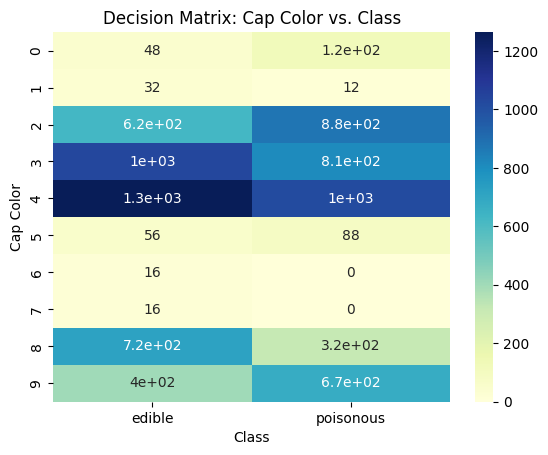

In [521]:
sns.heatmap(decision_matrix2, annot=True, cmap='YlGnBu')
plt.xlabel('Class')
plt.ylabel('Cap Color')
plt.title('Decision Matrix: Cap Color vs. Class')
plt.show()

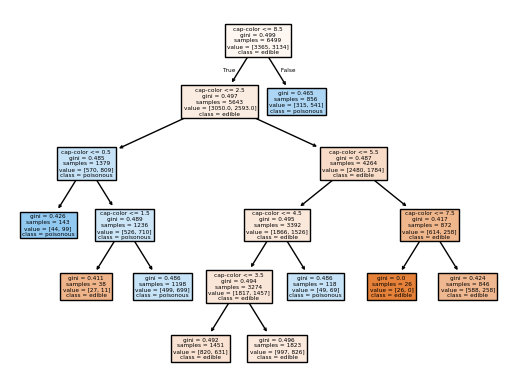

In [522]:
X2_single_feature = df_encoded[['cap-color']]
y2 = df_encoded['class']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_single_feature, y2, test_size=0.2, random_state=42)

tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)


# Plot the tree
plot_tree(tree_model2, feature_names=['cap-color'], class_names=['edible', 'poisonous'], filled=True)
plt.show()

In [523]:
# Predict on training data
y2_train_pred = tree_model2.predict(X2_train)

# Predict on test data
y2_pred = tree_model2.predict(X2_test)


print("Classification Report for Training Data for Case 2:")
print(classification_report(y2_train, y2_train_pred))

print("Classification Report for Test Data for Case 2:")
print(classification_report(y2_test, y2_pred))

print("Confusion Matrix for Case 2:")
print(confusion_matrix(y2_test, y2_pred))

Classification Report for Training Data for Case 2:
              precision    recall  f1-score   support

           0       0.59      0.73      0.65      3365
           1       0.61      0.45      0.52      3134

    accuracy                           0.59      6499
   macro avg       0.60      0.59      0.58      6499
weighted avg       0.60      0.59      0.59      6499

Classification Report for Test Data for Case 2:
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       843
           1       0.61      0.45      0.52       782

    accuracy                           0.60      1625
   macro avg       0.60      0.59      0.59      1625
weighted avg       0.60      0.60      0.59      1625

Confusion Matrix for Case 2:
[[622 221]
 [434 348]]


**Decision Matrix for Case 3** 

In [524]:
# Using the encoded data
df_case3 = df_encoded[['bruises', 'class']]

# Create a decision matrix / cross-tab
decision_matrix3 = pd.crosstab(df_case3['bruises'], df_case3['class'])

# Decode cap-color for readability
df_case3['bruises'] = label_encoders['bruises'].inverse_transform(df_case3['bruises'])

# Cross-tab with decoded labels
decision_matrix3 = pd.crosstab(df_case3['bruises'], df_case3['class'])

# Optional: decode the class too
decision_matrix3.columns = ['edible', 'poisonous']

print(decision_matrix3)

         edible  poisonous
bruises                   
0          1456       3292
1          2752        624


C:\Users\Sarah\AppData\Local\Temp\ipykernel_13736\344776232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case3['bruises'] = label_encoders['bruises'].inverse_transform(df_case3['bruises'])


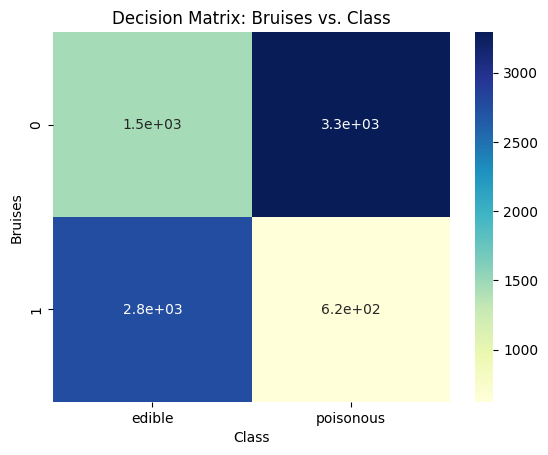

In [525]:
sns.heatmap(decision_matrix3, annot=True, cmap='YlGnBu')
plt.xlabel('Class')
plt.ylabel('Bruises')
plt.title('Decision Matrix: Bruises vs. Class')
plt.show()

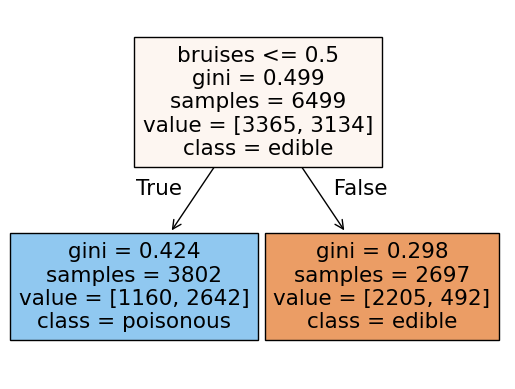

In [526]:

X3_single_feature = df_encoded[['bruises']]
y3 = df_encoded['class']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3_single_feature, y3, test_size=0.2, random_state=42)

tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)


# Plot the tree
plot_tree(tree_model3, feature_names=['bruises'], class_names=['edible', 'poisonous'], filled=True)
plt.show()

In [527]:
# Predict on training data
y3_train_pred = tree_model3.predict(X3_train)

# Predict on test data
y3_pred = tree_model3.predict(X3_test)


print("Classification Report for Training Data for Case 3:")
print(classification_report(y3_train, y3_train_pred))

print("Classification Report for Test Data for Case 3:")
print(classification_report(y3_test, y3_pred))

print("Confusion Matrix for Case 3:")
print(confusion_matrix(y3_test, y3_pred))

Classification Report for Training Data for Case 3:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73      3365
           1       0.69      0.84      0.76      3134

    accuracy                           0.75      6499
   macro avg       0.76      0.75      0.74      6499
weighted avg       0.76      0.75      0.74      6499

Classification Report for Test Data for Case 3:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       843
           1       0.69      0.83      0.75       782

    accuracy                           0.74      1625
   macro avg       0.75      0.74      0.74      1625
weighted avg       0.75      0.74      0.73      1625

Confusion Matrix for Case 3:
[[547 296]
 [132 650]]


**Decision Matrix for Case 4** 

In [528]:
# Using the encoded data
df_case4 = df_encoded[['odor', 'class']]

# Create a decision matrix / cross-tab
decision_matrix4 = pd.crosstab(df_case4['odor'], df_case4['class'])

# Decode cap-color for readability
df_case4['odor'] = label_encoders['odor'].inverse_transform(df_case4['odor'])

# Cross-tab with decoded labels
decision_matrix4 = pd.crosstab(df_case4['odor'], df_case4['class'])

# Optional: decode the class too
decision_matrix4.columns = ['edible', 'poisonous']

print(decision_matrix4)

      edible  poisonous
odor                   
0        400          0
1          0        192
2          0       2160
3        400          0
4          0         36
5       3408        120
6          0        256
7          0        576
8          0        576


C:\Users\Sarah\AppData\Local\Temp\ipykernel_13736\3071380438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case4['odor'] = label_encoders['odor'].inverse_transform(df_case4['odor'])


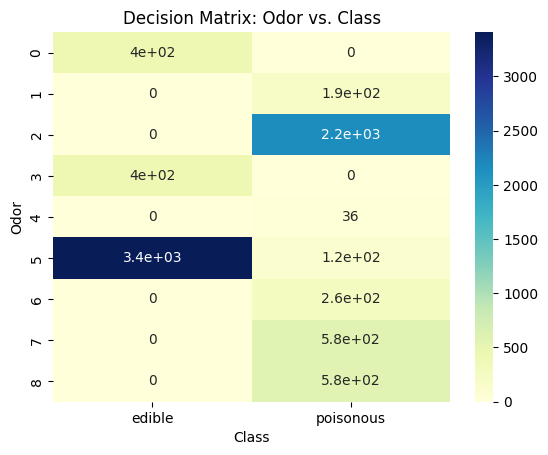

In [529]:
sns.heatmap(decision_matrix4, annot=True, cmap='YlGnBu')
plt.xlabel('Class')
plt.ylabel('Odor')
plt.title('Decision Matrix: Odor vs. Class')
plt.show()

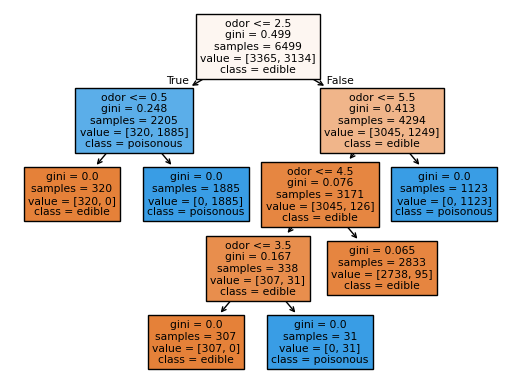

In [530]:
X4_single_feature = df_encoded[['odor']]
y4 = df_encoded['class']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4_single_feature, y4, test_size=0.2, random_state=42)

tree_model4 = DecisionTreeClassifier()
tree_model4.fit(X4_train, y4_train)


# Plot the tree
plot_tree(tree_model4, feature_names=['odor'], class_names=['edible', 'poisonous'], filled=True)
plt.show()

In [531]:
# Predict on training data
y4_train_pred = tree_model4.predict(X4_train)

# Predict on test data
y4_pred = tree_model4.predict(X4_test)


print("Classification Report for Training Data for Case 4:")
print(classification_report(y4_train, y4_train_pred))

print("Classification Report for Test Data for Case 4:")
print(classification_report(y4_test, y4_pred))

print("Confusion Matrix for Case 4:")
print(confusion_matrix(y4_test, y4_pred))

Classification Report for Training Data for Case 4:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3365
           1       1.00      0.97      0.98      3134

    accuracy                           0.99      6499
   macro avg       0.99      0.98      0.99      6499
weighted avg       0.99      0.99      0.99      6499

Classification Report for Test Data for Case 4:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       843
           1       1.00      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.99      0.98      0.98      1625
weighted avg       0.99      0.98      0.98      1625

Confusion Matrix for Case 4:
[[843   0]
 [ 25 757]]


**Decision Matrix for Case 5** 

In [532]:
# Using the encoded data
df_case5 = df_encoded[['habitat', 'class']]

# Create a decision matrix / cross-tab
decision_matrix5 = pd.crosstab(df_case5['habitat'], df_case5['class'])

# Decode cap-color for readability
df_case5['habitat'] = label_encoders['habitat'].inverse_transform(df_case5['habitat'])

# Cross-tab with decoded labels
decision_matrix5 = pd.crosstab(df_case5['habitat'], df_case5['class'])

# Optional: decode the class too
decision_matrix5.columns = ['edible', 'poisonous']

print(decision_matrix5)

         edible  poisonous
habitat                   
0          1880       1268
1          1408        740
2           240        592
3           256         36
4           136       1008
5            96        272
6           192          0


C:\Users\Sarah\AppData\Local\Temp\ipykernel_13736\633350353.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case5['habitat'] = label_encoders['habitat'].inverse_transform(df_case5['habitat'])


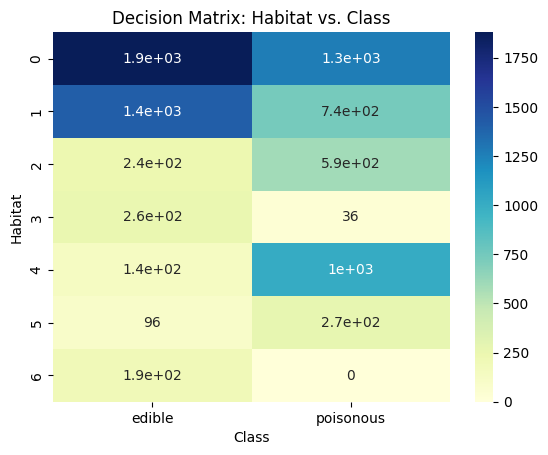

In [533]:
sns.heatmap(decision_matrix5, annot=True, cmap='YlGnBu')
plt.xlabel('Class')
plt.ylabel('Habitat')
plt.title('Decision Matrix: Habitat vs. Class')
plt.show()

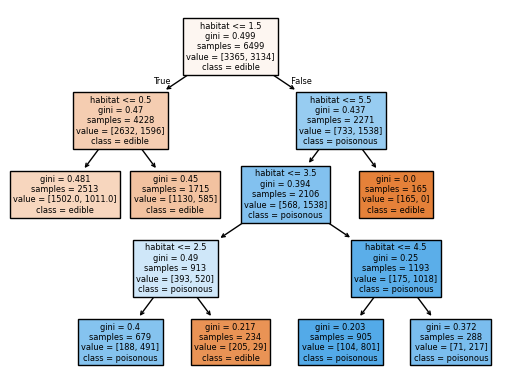

In [534]:
X5_single_feature = df_encoded[['habitat']]
y5 = df_encoded['class']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5_single_feature, y5, test_size=0.2, random_state=42)

tree_model5 = DecisionTreeClassifier()
tree_model5.fit(X5_train, y5_train)


# Plot the tree
plot_tree(tree_model5, feature_names=['habitat'], class_names=['edible', 'poisonous'], filled=True)
plt.show()

In [535]:
# Predict on training data
y5_train_pred = tree_model5.predict(X5_train)

# Predict on test data
y5_pred = tree_model5.predict(X5_test)


print("Classification Report for Training Data for Case 5:")
print(classification_report(y5_train, y5_train_pred))

print("Classification Report for Test Data for Case 5:")
print(classification_report(y5_test, y5_pred))

print("Confusion Matrix for Case 5:")
print(confusion_matrix(y5_test, y5_pred))

Classification Report for Training Data for Case 5:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75      3365
           1       0.81      0.48      0.60      3134

    accuracy                           0.69      6499
   macro avg       0.73      0.69      0.68      6499
weighted avg       0.72      0.69      0.68      6499

Classification Report for Test Data for Case 5:
              precision    recall  f1-score   support

           0       0.64      0.87      0.74       843
           1       0.77      0.46      0.58       782

    accuracy                           0.68      1625
   macro avg       0.70      0.67      0.66      1625
weighted avg       0.70      0.68      0.66      1625

Confusion Matrix for Case 5:
[[734 109]
 [419 363]]


**Decision Matrix for Case 6** 

In [536]:
# Using the encoded data
df_case6 = df_encoded[['cap-shape', 'odor', 'class']]

# Create a decision matrix / cross-tab
decision_matrix6 = pd.crosstab([df_case6['cap-shape'], df_case6['odor']], df_case6['class'])

# Decode cap-color for readability
df_case6['cap-shape'] = label_encoders['cap-shape'].inverse_transform(df_case6['cap-shape'])
df_case6['odor'] = label_encoders['odor'].inverse_transform(df_case6['odor'])

# Cross-tab with decoded labels
decision_matrix6 = pd.crosstab([df_case6['cap-shape'], df_case6['odor']], df_case6['class'])

# Optional: decode the class too
decision_matrix6.columns = ['edible', 'poisonous']

print(decision_matrix6)

                edible  poisonous
cap-shape odor                   
0         0        128          0
          3        128          0
          5        148         48
1         5          0          4
2         0         72          0
          2          0        984
          3         72          0
          4          0         12
          5       1452         48
          6          0        128
          7          0        192
          8          0        192
3         2          0        192
          4          0         12
          5        228         12
          7          0        192
          8          0        192
4         5         32          0
5         0        200          0
          1          0        192
          2          0        984
          3        200          0
          4          0         12
          5       1548          8
          6          0        128
          7          0        192
          8          0        192


C:\Users\Sarah\AppData\Local\Temp\ipykernel_13736\916317601.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case6['cap-shape'] = label_encoders['cap-shape'].inverse_transform(df_case6['cap-shape'])
C:\Users\Sarah\AppData\Local\Temp\ipykernel_13736\916317601.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case6['odor'] = label_encoders['odor'].inverse_transform(df_case6['odor'])


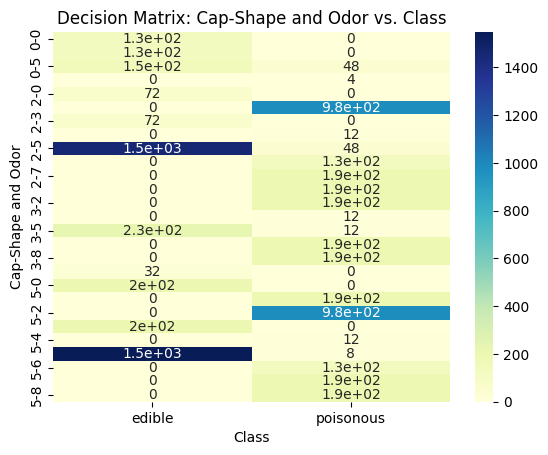

In [537]:
sns.heatmap(decision_matrix6, annot=True, cmap='YlGnBu')
plt.xlabel('Class')
plt.ylabel('Cap-Shape and Odor')
plt.title('Decision Matrix: Cap-Shape and Odor vs. Class')
plt.show()

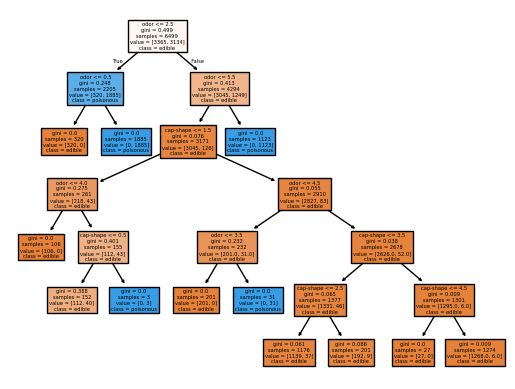

In [538]:
X6_single_feature = df_encoded[['cap-shape', 'odor']]
y6 = df_encoded['class']

X6_train, X6_test, y6_train, y6_test = train_test_split(X6_single_feature, y6, test_size=0.2, random_state=42)

tree_model6 = DecisionTreeClassifier()
tree_model6.fit(X6_train, y6_train)


# Plot the tree
plot_tree(tree_model6, feature_names=['cap-shape', 'odor'], class_names=['edible', 'poisonous'], filled=True)
plt.show()

In [539]:
# Predict on training data
y6_train_pred = tree_model6.predict(X6_train)

# Predict on test data
y6_pred = tree_model6.predict(X6_test)


print("Classification Report for Training Data for Case 6:")
print(classification_report(y6_train, y6_train_pred))

print("Classification Report for Test Data for Case 6:")
print(classification_report(y6_test, y6_pred))

print("Confusion Matrix for Case 6:")
print(confusion_matrix(y6_test, y6_pred))

Classification Report for Training Data for Case 6:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3365
           1       1.00      0.97      0.99      3134

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499

Classification Report for Test Data for Case 6:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       843
           1       1.00      0.97      0.98       782

    accuracy                           0.99      1625
   macro avg       0.99      0.98      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix for Case 6:
[[843   0]
 [ 24 758]]


#### Results of the 6 test cases using a Decision Tree for the Training Data

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | cap-shape | 57% | 63% |57% | 48% | Used the weighted average | 
|                   | Case 2 | cap-color | 59% | 60% | 59% | 59% | Used the weighted average |
|                   | Case 3 | bruises | 75% | 76% | 75% | 74% | Used the weighted average|
|                   | Case 4 | odor | 99% | 99% | 99% | 99% | Used the weighted average|
|                   | Case 5 | habitat | 69% | 72% | 69% | 68% | Used the weighted average|
|                   | Case 6 | cap-color and odor | 99% | 99% | 99% | 99% | Used the weighted average|

#### Results of the 6 test cases using a Decision Tree for the Test Data

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | cap-shape | 56% | 64% |56% | 47% | Used the weighted average  | 
|                   | Case 2 | cap-color | 60% | 60% | 60% | 59% | Used the weighted average |
|                   | Case 3 | bruises | 74% | 75% | 74% | 73% | Used the weighted average |
|                   | Case 4 | odor | 98% | 99% | 98% | 98% | Used the weighted average|
|                   | Case 5 | habitat | 68% | 70% | 68% | 66% | Used the weighted average|
|                   | Case 6 | cap-color and odor | 99% | 99% | 99% | 99% | Used the weighted average|

### Reflection 4: 
**How well did the model perform?**<br> 
The model performed fairly well between the test data and the training data.  The results were really consistent between the 2 of them.

**Any surprises in the results?**<br>
The results for odor and for cap-color and odor were surprising. While I suspected based on the bar charts that there was a strong correlation between odor and whether a mushroom is poisonous or edible, I really did not expect the decision tree results to have such a high percentage of accuracy.

## Section 5. Linear Regression

### Splitting the data into training set and a test set

In [540]:
# Split the data into a training set and a test set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=123)

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=123)

4 2


Train and Evaluate Linear Regression Models (all 6 cases)

In [541]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)
lr_model5 = LinearRegression().fit(X5_train, y5_train)
lr_model6 = LinearRegression().fit(X6_train, y6_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

y_pred_train5 = lr_model5.predict(X5_train)
y_pred_test5 = lr_model5.predict(X5_test)

y_pred_train6 = lr_model6.predict(X6_train)
y_pred_test6 = lr_model6.predict(X6_test)

Report Performance

In [542]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1)**2)
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2)**2)
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print()

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3)**2)
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print()

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4)**2)
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))
print()

print("Case 5: Training R²:", r2_score(y5_train, y_pred_train5))
print("Case 5: Test R²:", r2_score(y5_test, y_pred_test5))
print("Case 5: Test RMSE:", mean_squared_error(y5_test, y_pred_test5)**2)
print("Case 5: Test MAE:", mean_absolute_error(y5_test, y_pred_test5))
print()

print("Case 6: Training R²:", r2_score(y6_train, y_pred_train6))
print("Case 6: Test R²:", r2_score(y6_test, y_pred_test6))
print("Case 6: Test RMSE:", mean_squared_error(y6_test, y_pred_test6)**2)
print("Case 6: Test MAE:", mean_absolute_error(y6_test, y_pred_test6))


Case 1: Training R²: 0.0022215521052135756
Case 1: Test R²: 0.003918625645525919
Case 1: Test RMSE: 0.06153294646923516
Case 1: Test MAE: 0.49725676885549686

Case 2: Training R²: 0.0010171374912559816
Case 2: Test R²: -0.00022681705315075185
Case 2: Test RMSE: 0.062046181838735795
Case 2: Test MAE: 0.4986312529025962

Case 3: Training R²: 0.2524831344444364
Case 3: Test R²: 0.24702758985411888
Case 3: Test RMSE: 0.035162212938703946
Case 3: Test MAE: 0.3730262440253994

Case 4: Training R²: 0.008591511732406354
Case 4: Test R²: 0.008343323861719654
Case 4: Test RMSE: 0.06098748901722783
Case 4: Test MAE: 0.49463977952559574

Case 5: Training R²: 0.04912668312583868
Case 5: Test R²: 0.038302148291174176
Case 5: Test RMSE: 0.05735818027988893
Case 5: Test MAE: 0.4770912724434168

Case 6: Training R²: 0.010653160014848062
Case 6: Test R²: 0.012935881064705668
Case 6: Test RMSE: 0.06042390695067444
Case 6: Test MAE: 0.49291745379083857


### Table of Performance Results

In [504]:
data = {
    'Case': ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6'],
    'Training R²': [0.0022215521052135756, 0.0010171374912559816, 0.2524831344444364, 0.008591511732406354, 0.04912668312583868, 0.010653160014848062],
    'Test R²': [0.003918625645525919, -0.00022681705315075185, 0.24702758985411888, 0.008343323861719654, 0.038302148291174176, 0.012935881064705668],
    'Test RMSE': [0.06153294646923516, 0.062046181838735795, 0.035162212938703946, 0.06098748901722783, 0.05735818027988893, 0.06042390695067444],
    'Test MAE': [0.49725676885549686, 0.4986312529025962, 0.3730262440253994, 0.49463977952559574, 0.4770912724434168, 0.49291745379083857]
}

# Create DataFrame
df = pd.DataFrame(data)
df = df.round(3)
# Display table
print(df)

     Case  Training R²  Test R²  Test RMSE  Test MAE
0  Case 1        0.002    0.004      0.062     0.497
1  Case 2        0.001   -0.000      0.062     0.499
2  Case 3        0.252    0.247      0.035     0.373
3  Case 4        0.009    0.008      0.061     0.495
4  Case 5        0.049    0.038      0.057     0.477
5  Case 6        0.011    0.013      0.060     0.493


In [543]:
# Case 1. Cap-shape
X1 = df_encoded[['cap-shape']]
y1 = df_encoded['class']

# Case 2. Cap-color
X2 = df_encoded[['cap-color']]
y2 = df_encoded['class']

# Case 3. Bruises
X3 = df_encoded[['bruises']]
y3 = df_encoded['class']

# Case 4. Odor
X4 = df_encoded[['odor']]
y4 = df_encoded['class']

# Case 5. Habitat
X5 = df_encoded[['habitat']]
y5 = df_encoded['class']

# Case 6. Cap-shape and odor
X6 = df_encoded[['cap-shape', 'odor']]
y6 = df_encoded['class']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Create the logistic regression model
logreg_model1 = LogisticRegression()
logreg_model2 = LogisticRegression()
logreg_model3 = LogisticRegression()
logreg_model4 = LogisticRegression()
logreg_model5 = LogisticRegression()
logreg_model6 = LogisticRegression()

# Train the model on the training data
logreg_model1.fit(X1_train, y1_train)
logreg_model2.fit(X2_train, y2_train)
logreg_model3.fit(X3_train, y3_train)
logreg_model4.fit(X4_train, y4_train)
logreg_model5.fit(X5_train, y5_train)
logreg_model6.fit(X6_train, y6_train)

# Make predictions on the test set
y1_pred = logreg_model1.predict(X1_test)
y2_pred = logreg_model2.predict(X2_test)
y3_pred = logreg_model3.predict(X3_test)
y4_pred = logreg_model4.predict(X4_test)
y5_pred = logreg_model5.predict(X5_test)
y6_pred = logreg_model6.predict(X6_test)

# Evaluate the model
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f"Case 1 Accuracy: {accuracy1:.4f}")
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f"Case 2 Accuracy: {accuracy2:.4f}")
accuracy3 = accuracy_score(y3_test, y3_pred)
print(f"Case 3 Accuracy: {accuracy3:.4f}")
accuracy4 = accuracy_score(y4_test, y4_pred)
print(f"Case 4 Accuracy: {accuracy4:.4f}")
accuracy5 = accuracy_score(y5_test, y5_pred)
print(f"Case 5 Accuracy: {accuracy5:.4f}")
accuracy6 = accuracy_score(y6_test, y6_pred)
print(f"Case 6 Accuracy: {accuracy6:.4f}")

#print model coefficients for interpretability
print(f"Case 1 Coefficients: {logreg_model1.coef_}")
print(f"Case 2 Coefficients: {logreg_model2.coef_}")
print(f"Case 3 Coefficients: {logreg_model3.coef_}")
print(f"Case 4 Coefficients: {logreg_model4.coef_}")
print(f"Case 5 Coefficients: {logreg_model5.coef_}")
print(f"Case 6 Coefficients: {logreg_model6.coef_}")

Case 1 Accuracy: 0.5028
Case 2 Accuracy: 0.5268
Case 3 Accuracy: 0.7366
Case 4 Accuracy: 0.6997
Case 5 Accuracy: 0.6314
Case 6 Accuracy: 0.7280
Case 1 Coefficients: [[0.05624018]]
Case 2 Coefficients: [[-0.02370796]]
Case 3 Coefficients: [[-2.31461001]]
Case 4 Coefficients: [[-0.09307438]]
Case 5 Coefficients: [[0.25923785]]
Case 6 Coefficients: [[ 0.05361766 -0.09211662]]


### Reflection 5: 

**Which model performed better?**<br>
The Decision Tree model performed the best with very high accuracy on Case 4 - odor and Case 6 - cap-color and odor. Linear regression performed well in Case 3 - bruises.  Logistic regression performed the worst with these cases.

**Why might one classifier be more effective in this specific case?**<br>
Decision trees tend to work well with categorical data, which this dataset primarily consisted of.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.
This analysis reviewed the UCI Mushroom dataset using 3 different models - decision tree, linear regression, and logistic regression. Six different variables were selected to determine if the variable can be used to predict if the mushroom is poisonous or edible. While all models performed well with the data, the decision tree model did the best at predicting if a mushroom is poisonous or edible.

### 6.2 Discuss challenges faced.
This dataset proved to be very challenging for me in being able to use the categorical data and to encode for the models. I would find that my code would not run properly, and I had to spend a lot of time debugging my code.

### 6.3 If you had more time, what would you try next?
If I had more time, I would like to try other variables. I am curious if there are any other variables that would present a 99% accuracy result.

### Reflection 6: 

**What did you learn from this project?**<br>
This project was very challenging for me. I learned about converting the categorical data, decoding the data, and worked on improving my debugging skills.  I was impressed to see that there were models that could predict 99% accuracy. I really did not expect to be able to get that strong of results in the analysis, and this project proved that it is possible to actually be able to make accurate predictions.